In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
original_df = pd.read_csv('Sales_Data.csv')
original_df.head()

,Unnamed: 0,Order ID,Product Category,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time of Day
0,0,295665,Laptops and Computers,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,1,295666,Home Appliances,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,2,295667,Charging Cables,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,3,295668,Monitors,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,4,295669,Charging Cables,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon


In [3]:
df = original_df.copy()
df = pd.read_csv('Sales_Data.csv')

In [4]:
monthly_sales = df.groupby('Month')['Sales'].sum()

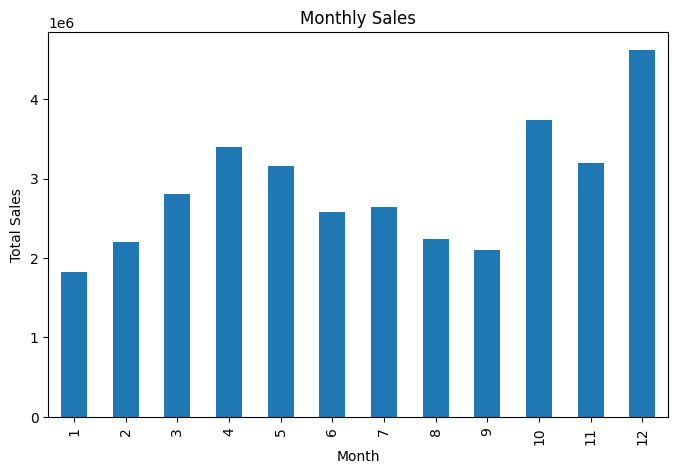

In [5]:
plt.figure(figsize=(8,5))
monthly_sales.plot(kind='bar')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


# Monthly Product Sales (Top Products)

In [6]:
Monthly_product_sales = (df.groupby(['Month', 'Product'])['Sales'].sum().reset_index())
Monthly_product_sales

,Month,Product,Sales
0,1,20in Monitor,23977.82
1,1,27in 4K Gaming Monitor,122066.87
2,1,27in FHD Monitor,63295.78
3,1,34in Ultrawide Monitor,119316.86
4,1,AA Batteries (4-pack),5468.16
...,...,...,...
223,12,ThinkPad Laptop,538994.61
224,12,USB-C Charging Cable,38837.50
225,12,Vareebadd Phone,113600.00
226,12,Wired Headphones,32960.51


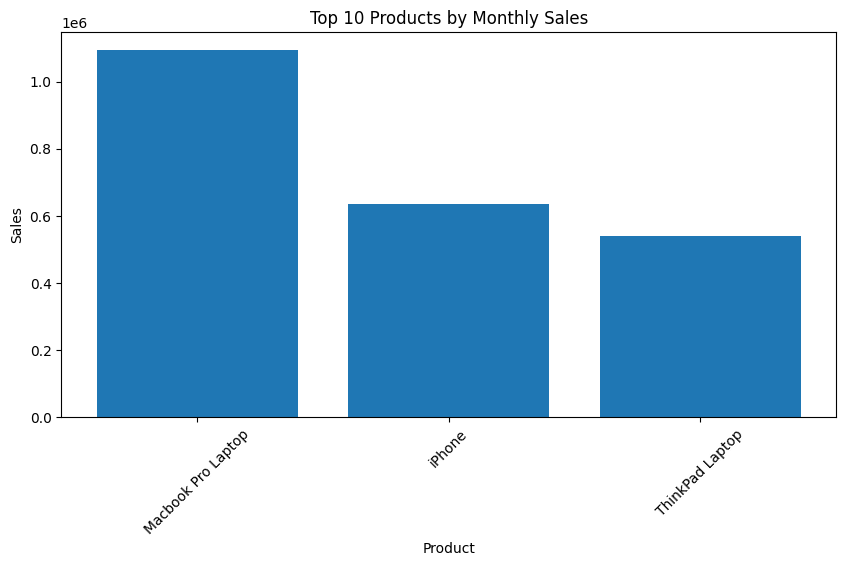

In [7]:
top10_products = Monthly_product_sales.sort_values('Sales', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top10_products['Product'], top10_products['Sales'])
plt.title("Top 10 Products by Monthly Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


# Monthly City-wise Sales

In [8]:
Monthly_city_sales = (df.groupby(['Month', 'City'])['Sales'].sum().reset_index())
Monthly_city_sales

,Month,City,Sales
0,1,Atlanta,149159.54
1,1,Austin,88087.06
2,1,Boston,201088.49
3,1,Dallas,143462.51
4,1,Los Angeles,288601.90
...,...,...,...
103,12,Los Angeles,684044.84
104,12,New York City,646770.83
105,12,Portland,303714.11
106,12,San Francisco,1106601.27


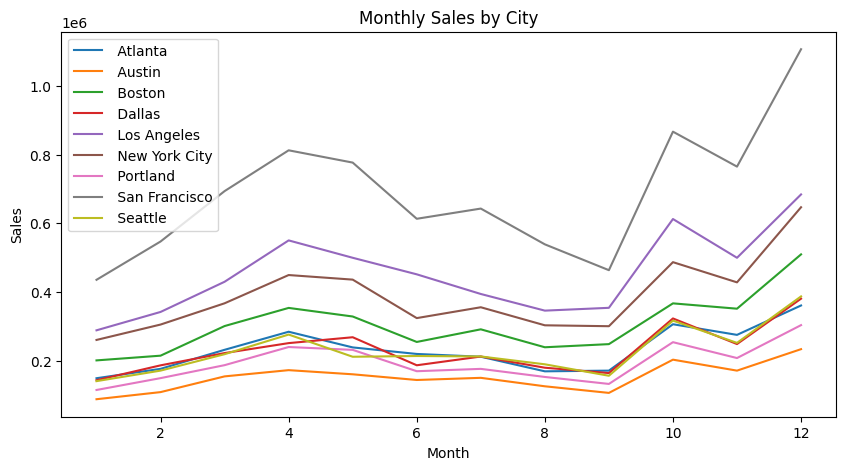

In [9]:
plt.figure(figsize=(10,5))

for city in Monthly_city_sales['City'].unique():
    city_data = Monthly_city_sales[Monthly_city_sales['City'] == city]
    plt.plot(city_data['Month'], city_data['Sales'], label=city)

plt.title("Monthly Sales by City")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()


# Monthly Sales by Hour

In [10]:
Monthly_hour_sales = (df.groupby(['Month', 'Hour'])['Sales'] .sum() .reset_index())
Monthly_hour_sales

,Month,Hour,Sales
0,1,0,42715.96
1,1,1,24645.65
2,1,2,17600.97
3,1,3,6798.74
4,1,4,6418.30
...,...,...,...
283,12,19,323274.15
284,12,20,321235.30
285,12,21,255373.54
286,12,22,212241.78


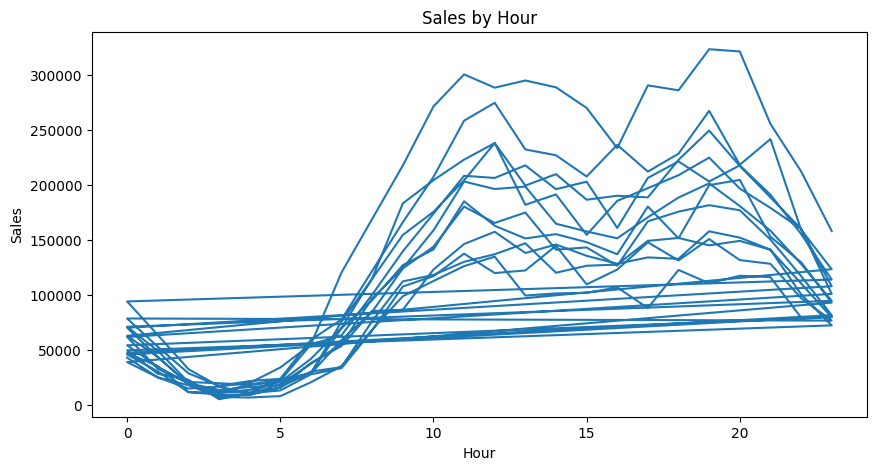

In [11]:
plt.figure(figsize=(10,5))
plt.plot(Monthly_hour_sales['Hour'], Monthly_hour_sales['Sales'])
plt.title("Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.show()


# Monthly Sales by Time of Day

In [12]:
Monthly_time_sales = ( df.groupby(['Month', 'Time of Day'])['Sales'] .sum() .reset_index())


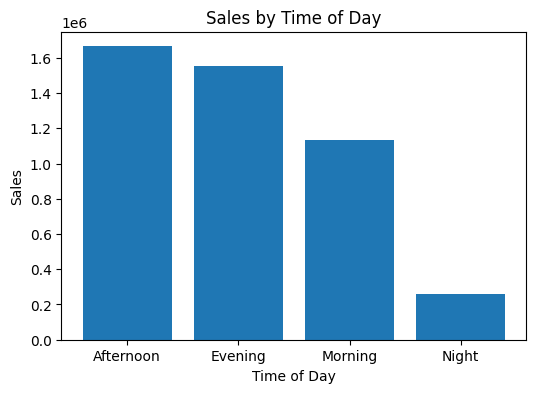

In [13]:
plt.figure(figsize=(6,4))
plt.bar(Monthly_time_sales['Time of Day'], Monthly_time_sales['Sales'])
plt.title("Sales by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Sales")
plt.show()


# Maximum Sales Month

In [14]:
monthly_sales = df.groupby('Month')['Sales'].sum()

max_month = monthly_sales.idxmax()
max_month_sales = monthly_sales.max()

max_month, max_month_sales

(12, 4613443.34)

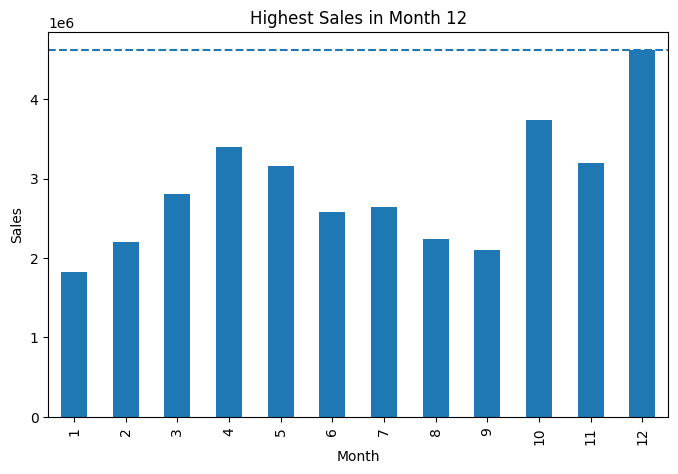

In [15]:
plt.figure(figsize=(8,5))
monthly_sales.plot(kind='bar')

plt.axhline(max_month_sales, linestyle='--')
plt.title(f"Highest Sales in Month {max_month}")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


# PRODUCT

# Maximum Sales Product

In [16]:
product_sales = df.groupby('Product')['Sales'].sum()
top_product = product_sales.idxmax()
top_product_sales = product_sales.max()
top_product, top_product_sales


('Macbook Pro Laptop', 8037600.0)

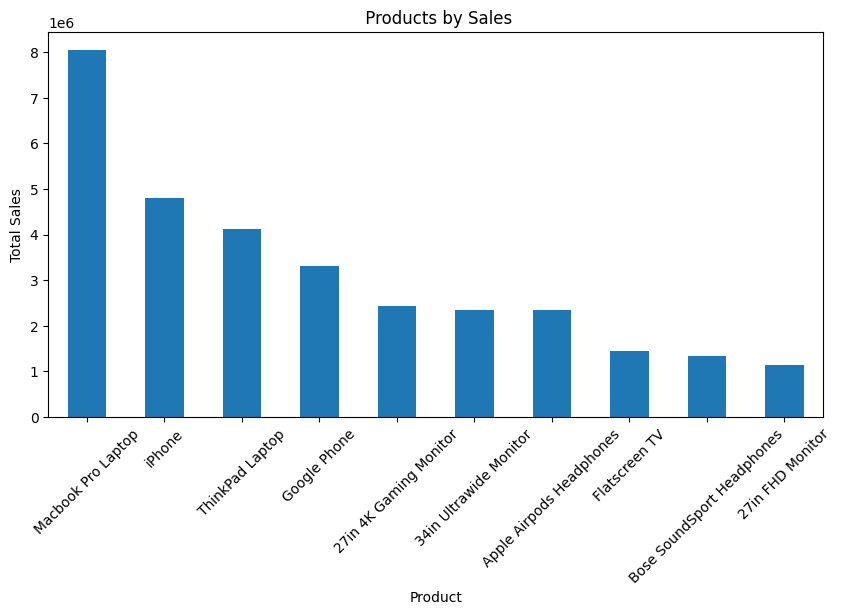

In [17]:
plt.figure(figsize=(10,5))
product_sales.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title(" Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


# Peak Sales Hour

In [18]:
hour_sales = df.groupby('Hour')['Sales'].sum()

peak_hour = hour_sales.idxmax()
peak_hour_sales = hour_sales.max()




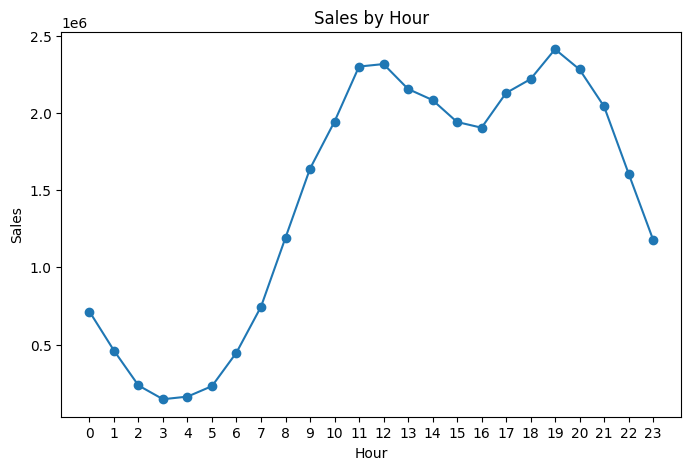

In [19]:
plt.figure(figsize=(8,5))
plt.plot(hour_sales.index, hour_sales.values, marker='o')
plt.title("Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.xticks(hour_sales.index)
plt.show()


# Product-wise total sales

In [20]:
product_sales = df.groupby(['Product Category', 'Product'])['Sales'].sum().reset_index()


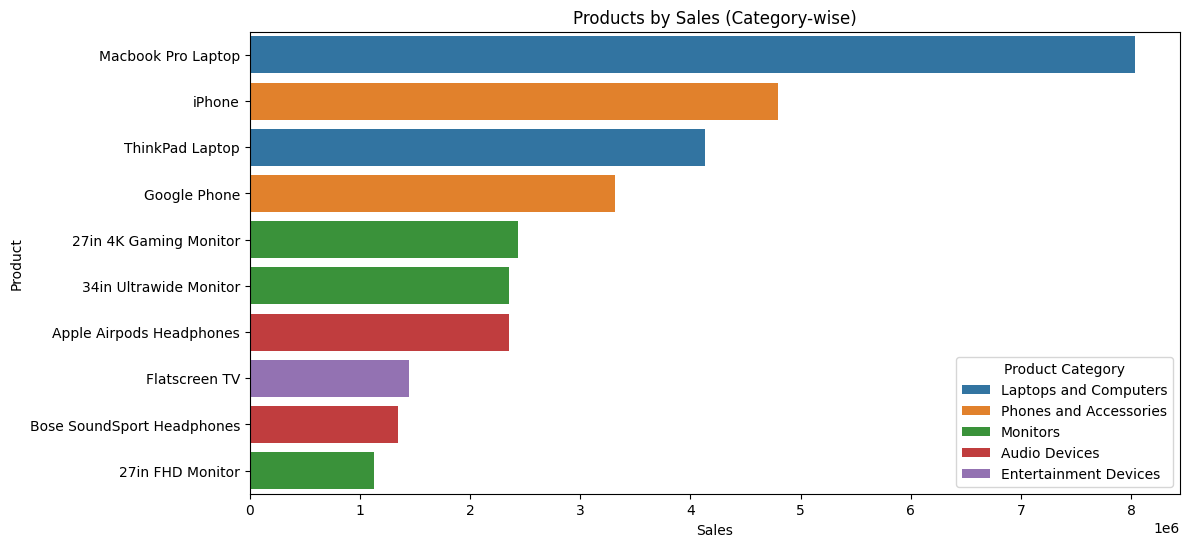

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=product_sales.sort_values('Sales', ascending=False).head(10),
    x='Sales',
    y='Product',
    hue='Product Category'
)
plt.title("Products by Sales (Category-wise)")
plt.show()


# Product-wise Quantity Sold

In [22]:
product_quantity = (df.groupby('Product')['Quantity Ordered']
    .sum()
    .reset_index()
    .sort_values('Quantity Ordered', ascending=False))


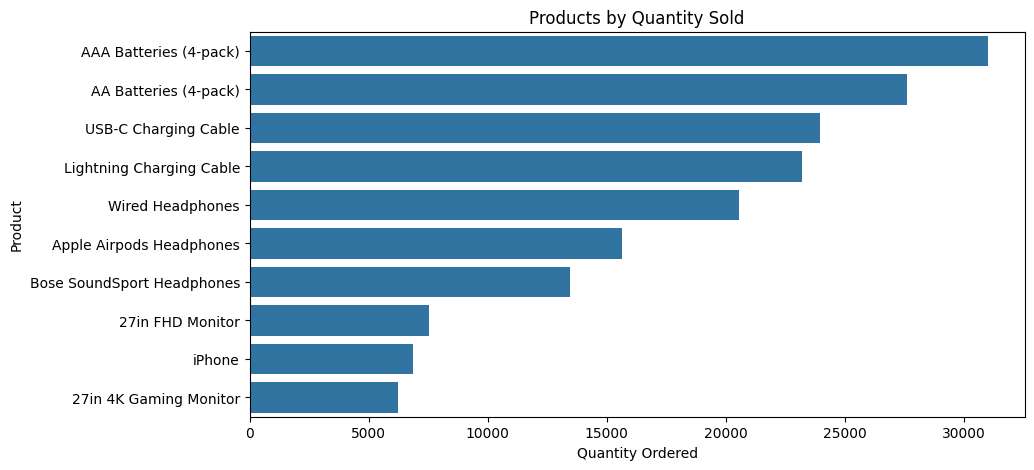

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data=product_quantity.head(10),
    x='Quantity Ordered',
    y='Product')
plt.title("Products by Quantity Sold")
plt.show()


# Category-wise Sales

In [24]:
category_sales = (df.groupby('Product Category')['Sales'].sum()
    .reset_index()
    .sort_values('Sales', ascending=False))


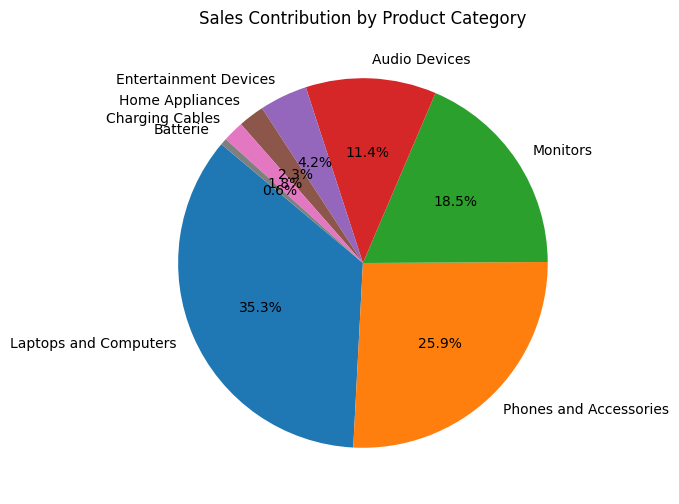

In [25]:
plt.figure(figsize=(6,6))
plt.pie(
    category_sales['Sales'],
    labels=category_sales['Product Category'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Sales Contribution by Product Category")
plt.show()


# City_Wise_sales

# City-wise Total Sales

In [26]:
city_sales = (df.groupby('City')['Sales'].sum().reset_index()
    .sort_values('Sales', ascending=False)
)



C:\Users\tejas\AppData\Local\Temp\ipykernel_7296\3727664312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_sales,


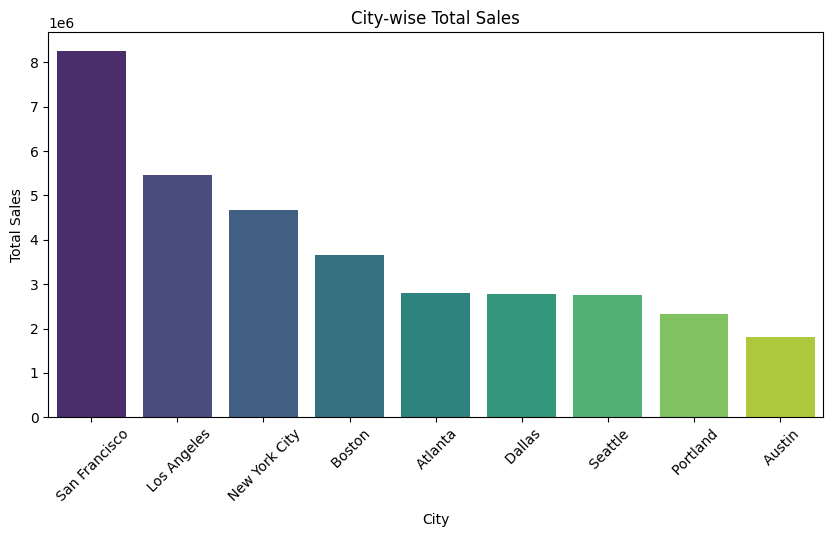

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(data=city_sales,
    x='City',
    y='Sales',
    palette='viridis')
plt.title("City-wise Total Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


# City-wise Order Count

In [28]:
city_orders = (df.groupby('City')['Order ID'] .count() .reset_index(name='Total Orders')
    .sort_values('Total Orders', ascending=False)
)


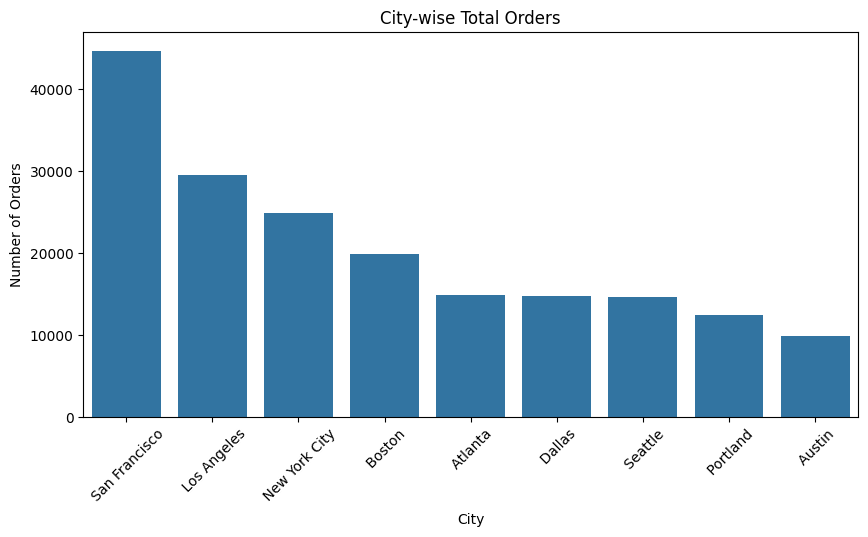

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=city_orders,
    x='City',
    y='Total Orders',
    legend=False
)
plt.title("City-wise Total Orders")
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


# City + Product Category Analysis

In [30]:
city_category_sales = (df.groupby(['City', 'Product Category'])['Sales'].sum()
    .reset_index()
)


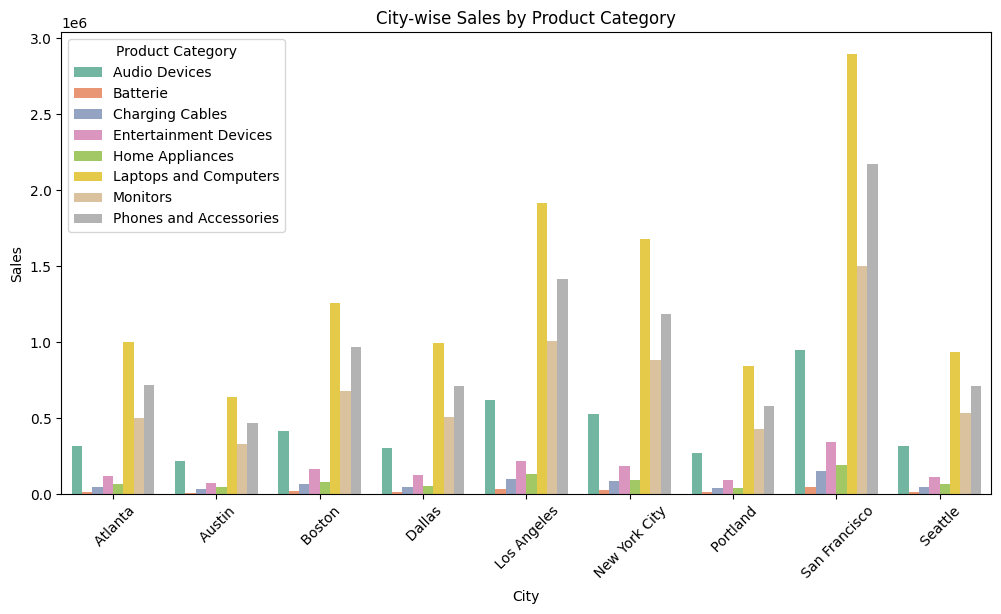

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=city_category_sales,
    x='City',
    y='Sales',
    hue='Product Category',
    palette='Set2'
)
plt.title("City-wise Sales by Product Category")
plt.xlabel("City")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.show()


# Top Category in Each City

In [32]:
city_category_sales = (df.groupby(['City', 'Product Category'])['Sales'].sum().reset_index())

top_category_city = city_category_sales.loc[
    city_category_sales.groupby('City')['Sales'].idxmax()
]

top_category_city

,City,Product Category,Sales
5,Atlanta,Laptops and Computers,1001296.43
13,Austin,Laptops and Computers,636697.90
21,Boston,Laptops and Computers,1261295.53
29,Dallas,Laptops and Computers,994396.55
37,Los Angeles,Laptops and Computers,1917693.59
45,New York City,Laptops and Computers,1676894.40
53,Portland,Laptops and Computers,846897.26
61,San Francisco,Laptops and Computers,2894190.37
69,Seattle,Laptops and Computers,938196.67


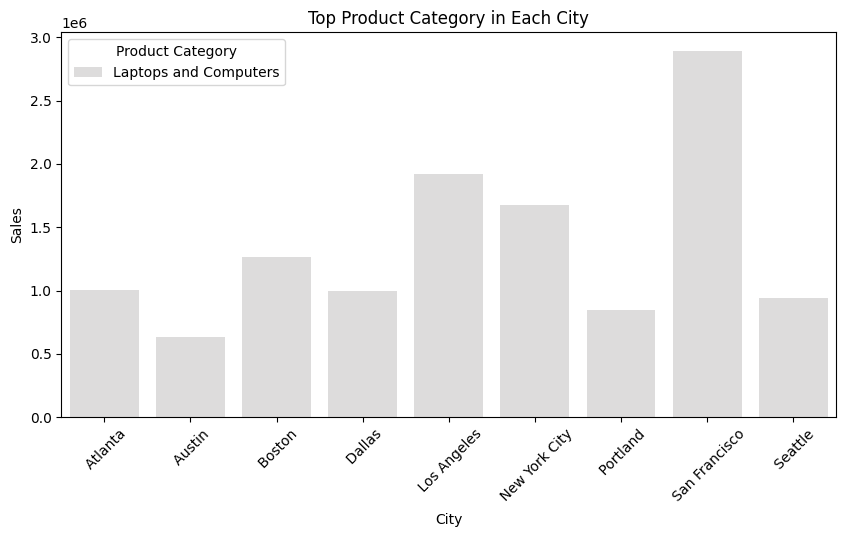

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_category_city,
    x='City',
    y='Sales',
    hue='Product Category',
    palette='coolwarm'
)
plt.title("Top Product Category in Each City")
plt.xlabel("City")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


# City-wise Sales Trend Over Time

In [34]:
city_date_sales = (df.groupby(['City', 'Order Date'])['Sales'].sum()
      .reset_index()
)
city_date_sales.head()


,City,Order Date,Sales
0,Atlanta,01-01-2019 06:03,23.90
1,Atlanta,01-01-2019 06:13,700.00
2,Atlanta,01-01-2019 08:44,150.00
3,Atlanta,01-01-2019 09:33,700.00
4,Atlanta,01-01-2019 09:38,7.68


In [39]:
city_date_sales['Order Date'] = pd.to_datetime(
    city_date_sales['Order Date'],
    dayfirst=True
)


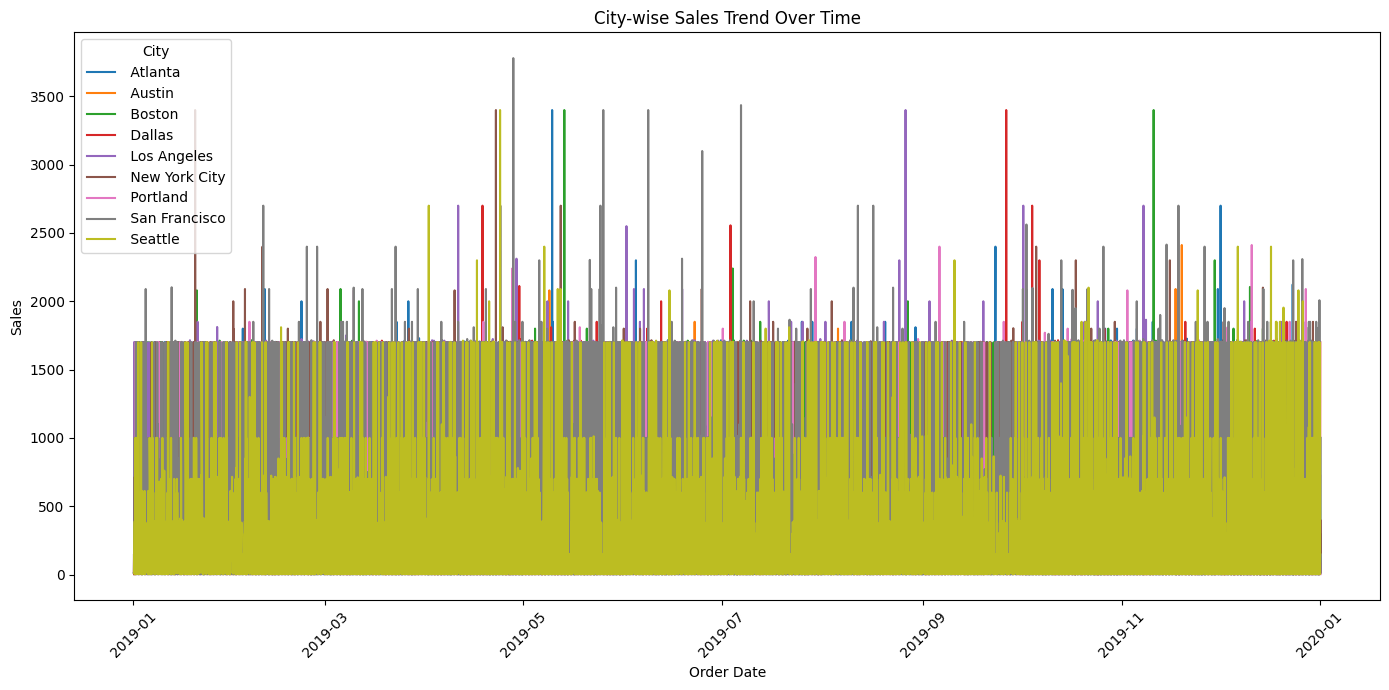

In [41]:
plt.figure(figsize=(14,7))

sns.lineplot(
    data=city_date_sales,
    x='Order Date',
    y='Sales',
    hue='City'
)

plt.title("City-wise Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Peak Purchase Date per City

In [42]:
peak_date_city = city_date_sales.loc[
    city_date_sales.groupby('City')['Sales'].idxmax()]
peak_date_city



,City,Order Date,Sales
3778,Atlanta,2019-05-09 19:46:00,3400.00
19754,Austin,2019-11-19 12:00:00,2411.99
29425,Boston,2019-11-10 20:19:00,3400.00
53658,Dallas,2019-09-26 11:58:00,3400.00
78939,Los Angeles,2019-08-26 12:57:00,3400.00
97808,New York City,2019-01-20 00:15:00,3400.00
110687,Portland,2019-12-11 00:30:00,2411.99
153412,San Francisco,2019-04-27 21:01:00,3779.99
169030,Seattle,2019-04-23 19:23:00,3400.00


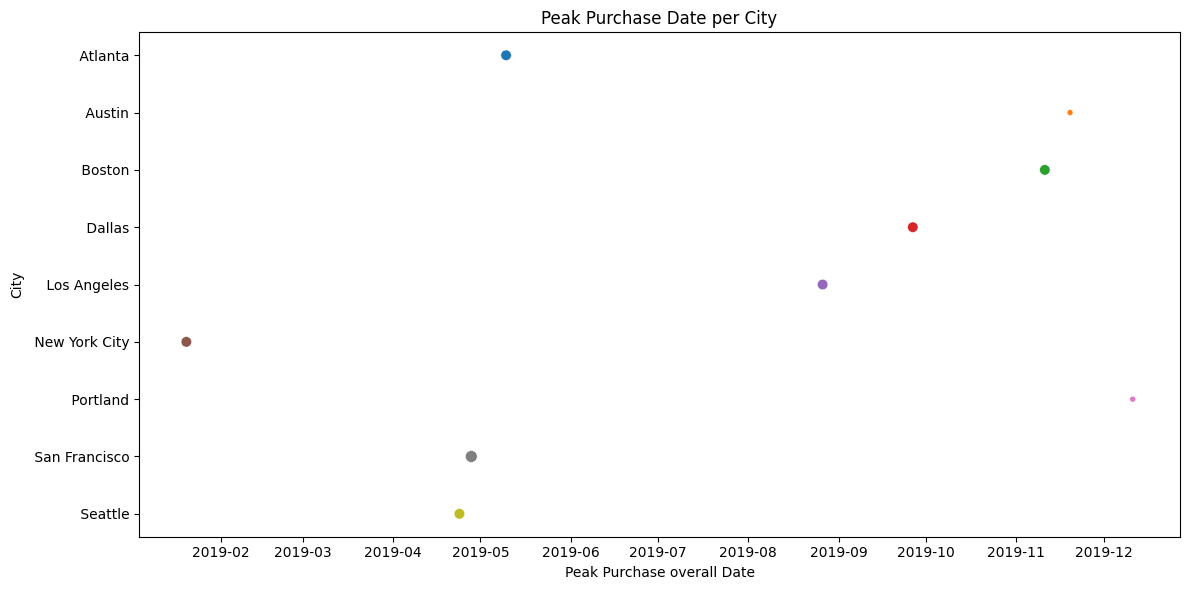

In [50]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=peak_date_city,
    x='Order Date',
    y='City',
    size='Sales',
    hue='City',
    legend=False
)
plt.title("Peak Purchase Date per City")
plt.xlabel("Peak Purchase overall Date")
plt.ylabel("City")
plt.tight_layout()
plt.show()
